In [14]:
# Install networkx directly from notebook
import sys
!{sys.executable} -m pip install networkx


   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/2.1 MB 15.5 MB/s  0:00:00



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print("Step 1: Starting to load CSV files...")

content_catalog = pd.read_csv('../data/content_catalog.csv')
print("✓ content_catalog loaded")

user_watch_history = pd.read_csv('../data/user_watch_history.csv')
print("✓ user_watch_history loaded")

print("Step 2: Showing first few rows of content_catalog")
display(content_catalog.head())

print("Step 3: Showing first few rows of user_watch_history")
display(user_watch_history.head())

Step 1: Starting to load CSV files...
✓ content_catalog loaded
✓ user_watch_history loaded
Step 2: Showing first few rows of content_catalog


,content_id,title,genre,type,release_year
0,C001,Title_1,Sci-Fi,Show,2010
1,C002,Title_2,Action,Movie,2010
2,C003,Title_3,Thriller,Movie,2014
3,C004,Title_4,Romance,Show,2000
4,C005,Title_5,Documentary,Movie,2022


Step 3: Showing first few rows of user_watch_history


,user_id,content_id,watch_time_min,rating,watch_date
0,U0001,C118,164,2,2025-06-23 16:09:50.935680
1,U0001,C079,20,5,2025-06-16 16:09:50.935852
2,U0001,C061,34,3,2025-09-05 16:09:50.935963
3,U0001,C198,59,4,2026-01-31 16:09:50.936052
4,U0001,C130,130,2,2025-11-02 16:09:50.936127


In [3]:
print("Step 4: Merging watch history with content catalog...")

df = user_watch_history.merge(content_catalog, on='content_id', how='left')

print("✓ Merge completed")
print("Dataset shape:", df.shape)

display(df.head())


Step 4: Merging watch history with content catalog...
✓ Merge completed
Dataset shape: (11962, 9)


,user_id,content_id,watch_time_min,rating,watch_date,title,genre,type,release_year
0,U0001,C118,164,2,2025-06-23 16:09:50.935680,Title_118,Comedy,Movie,2019
1,U0001,C079,20,5,2025-06-16 16:09:50.935852,Title_79,Romance,Movie,2008
2,U0001,C061,34,3,2025-09-05 16:09:50.935963,Title_61,Sci-Fi,Movie,2020
3,U0001,C198,59,4,2026-01-31 16:09:50.936052,Title_198,Thriller,Show,2006
4,U0001,C130,130,2,2025-11-02 16:09:50.936127,Title_130,Drama,Movie,2010


AnaAnalyzing most watched genres... 
genre
Action         2252
Comedy         1887
Thriller       1779
Drama          1778
Documentary    1609
Romance        1461
Sci-Fi         1196
Name: count, dtype: int64


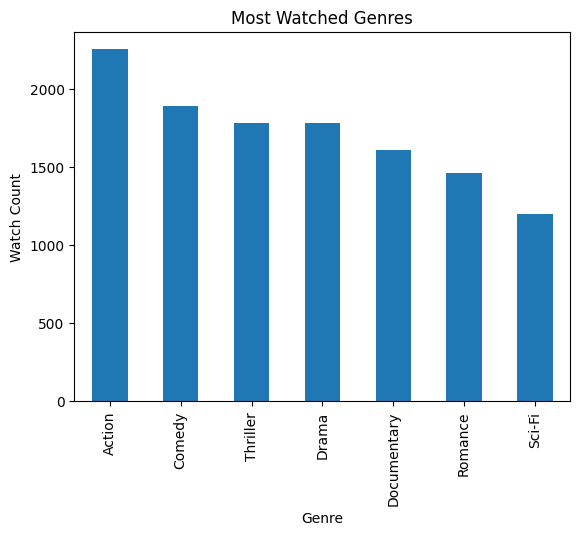

In [4]:
print("AnaAnalyzing most watched genres... ")

genre_watch = df['genre'].value_counts()
print(genre_watch)

genre_watch.plot(kind='bar')
plt.title('Most Watched Genres')
plt.xlabel('Genre')
plt.ylabel('Watch Count')
plt.show()

Analyzing Movies vs Shows preference...
type
Movie    6860
Show     5102
Name: count, dtype: int64


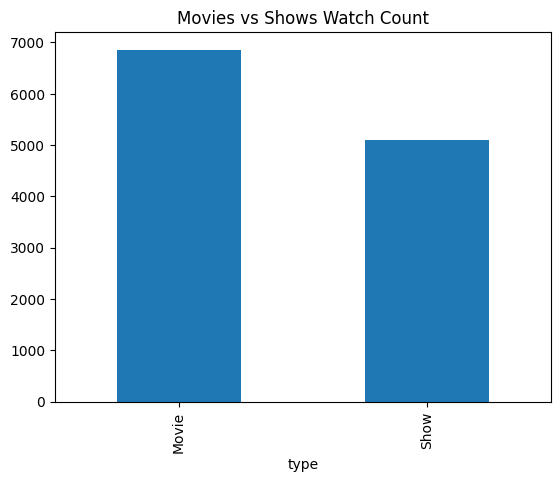

In [5]:
print("Analyzing Movies vs Shows preference...")

type_watch = df['type'].value_counts()
print(type_watch)

type_watch.plot(kind='bar')
plt.title('Movies vs Shows Watch Count')
plt.show()


In [6]:
print("Calculating average watch time per genre...")

avg_watch = df.groupby('genre')['watch_time_min'].mean().sort_values(ascending=False)
print(avg_watch)


Calculating average watch time per genre...
genre
Comedy         93.519343
Thriller       92.898820
Sci-Fi         92.694816
Drama          92.490439
Documentary    92.243630
Action         91.882771
Romance        91.077344
Name: watch_time_min, dtype: float64


In [8]:
print("Finding genre combinations watched by same users...")

user_genres = df.groupby('user_id')['genre'].apply(list)

from collections import Counter
from itertools import combinations

combo_counter = Counter()

for genres in user_genres:
    unique_genres = set(genres)
    combos = combinations(unique_genres, 2)
    combo_counter.update(combos)

combo_counter.most_common(10)


Finding genre combinations watched by same users...


[(('Thriller', 'Action'), 298),
 (('Action', 'Drama'), 298),
 (('Comedy', 'Action'), 297),
 (('Thriller', 'Drama'), 296),
 (('Documentary', 'Action'), 295),
 (('Thriller', 'Comedy'), 295),
 (('Comedy', 'Drama'), 295),
 (('Action', 'Romance'), 295),
 (('Documentary', 'Thriller'), 293),
 (('Documentary', 'Comedy'), 293)]

Analyzing binge behavior...
Summary of content watched per user:
count    300.000000
mean      39.873333
std       11.924959
min       20.000000
25%       29.000000
50%       40.000000
75%       50.000000
max       60.000000
dtype: float64


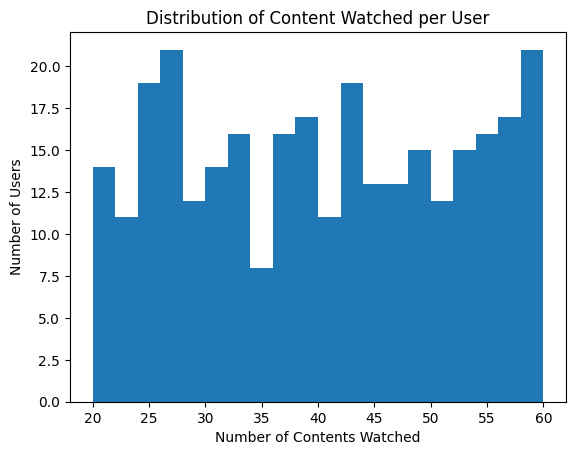

In [9]:
print("Analyzing binge behavior...")

# Count number of watch entries per user
binge_counts = df.groupby('user_id').size()

print("Summary of content watched per user:")
print(binge_counts.describe())

# Visualize
binge_counts.plot(kind='hist', bins=20)
plt.title('Distribution of Content Watched per User')
plt.xlabel('Number of Contents Watched')
plt.ylabel('Number of Users')
plt.show()


In [10]:
print("Analyzing watch sequences...")

# Sort by user and watch date
df['watch_date'] = pd.to_datetime(df['watch_date'])
df_sorted = df.sort_values(by=['user_id', 'watch_date'])

# Take first 5 watch sequences of a sample user
sample_user = df_sorted['user_id'].iloc[0]
user_sequence = df_sorted[df_sorted['user_id'] == sample_user]['title'].tolist()

print(f"First 5 contents watched by user {sample_user}:")
print(user_sequence[:5])


Analyzing watch sequences...
First 5 contents watched by user U0001:
['Title_46', 'Title_191', 'Title_107', 'Title_154', 'Title_133']


In [11]:
print("Analyzing content affinity...")

# Create pairs of content watched by same user
from itertools import combinations
from collections import Counter

user_contents = df_sorted.groupby('user_id')['content_id'].apply(list)

content_pair_counter = Counter()

for contents in user_contents:
    unique_contents = set(contents)
    pairs = combinations(unique_contents, 2)
    content_pair_counter.update(pairs)

# Most common content pairs
print("Top 10 content pairs watched by same users:")
content_pair_counter.most_common(10)


Analyzing content affinity...
Top 10 content pairs watched by same users:


[(('C165', 'C021'), 25),
 (('C025', 'C031'), 24),
 (('C050', 'C049'), 23),
 (('C155', 'C005'), 22),
 (('C043', 'C011'), 22),
 (('C141', 'C094'), 22),
 (('C133', 'C135'), 22),
 (('C050', 'C167'), 22),
 (('C174', 'C045'), 22),
 (('C151', 'C137'), 22)]

Visualizing top content affinity pairs...


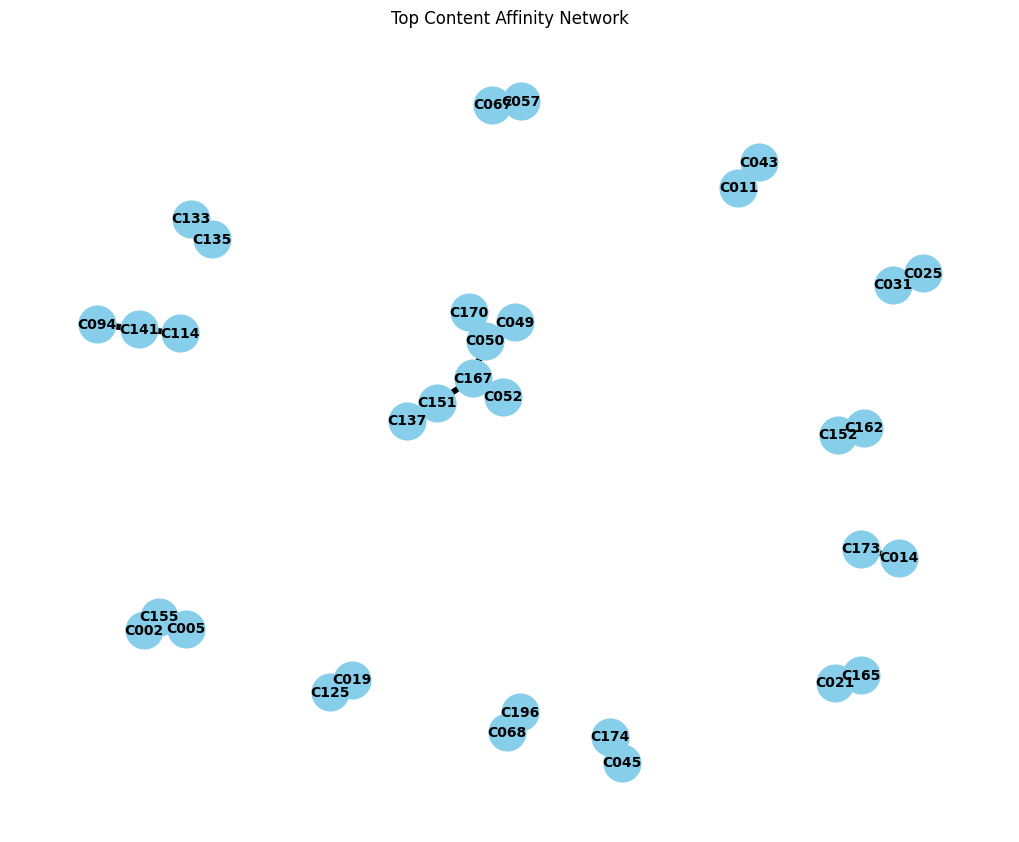

In [15]:
print("Visualizing top content affinity pairs...")

import networkx as nx

# Take top 20 pairs for clarity
top_pairs = content_pair_counter.most_common(20)

G = nx.Graph()
for (c1, c2), count in top_pairs:
    G.add_edge(c1, c2, weight=count)

plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight']*0.2 for (u,v,d) in edges])
plt.title("Top Content Affinity Network")
plt.show()


In [16]:
print("Building item-item recommendation logic...")

# Calculate co-watch counts for each content
co_watch_df = pd.DataFrame(content_pair_counter.items(), columns=['pair', 'count'])
co_watch_df[['content_1', 'content_2']] = pd.DataFrame(co_watch_df['pair'].tolist(), index=co_watch_df.index)
co_watch_df.drop('pair', axis=1, inplace=True)

# Sort by count descending
co_watch_df = co_watch_df.sort_values(by='count', ascending=False)
co_watch_df.head(10)


Building item-item recommendation logic...


,count,content_1,content_2
1339,25,C165,C021
2358,24,C025,C031
5892,23,C050,C049
5484,22,C133,C135
8932,22,C151,C137
3582,22,C043,C011
7731,22,C174,C045
2728,22,C155,C005
5902,22,C050,C167
3825,22,C141,C094


In [18]:
print("Creating recommendation function...")

# Build a dictionary from co-watch DataFrame
recommend_dict = {}

for _, row in co_watch_df.iterrows():
    c1, c2, count = row['content_1'], row['content_2'], row['count']
    recommend_dict.setdefault(c1, []).append((c2, count))
    recommend_dict.setdefault(c2, []).append((c1, count))

# Sort recommendations for each content by count
for key in recommend_dict:
    recommend_dict[key] = sorted(recommend_dict[key], key=lambda x: x[1], reverse=True)

# Function to get top N recommendations
def recommend_content(content_id, top_n=3):
    if content_id in recommend_dict:
        return [c for c, _ in recommend_dict[content_id][:top_n]]
    else:
        return []

# Test the function
sample_content = 'C165'
print(f"Top recommendations for {sample_content}: {recommend_content(sample_content)}")


Creating recommendation function...
Top recommendations for C165: ['C021', 'C004', 'C149']


In [19]:
print("Business Insights Summary:")

# 1. Most popular genres (from EDA)
print("Most watched genre:", genre_watch.idxmax(), "with", genre_watch.max(), "watches")
print("Genre with highest average watch time:", avg_watch.idxmax(), "with", round(avg_watch.max(),2), "minutes avg watch")

# 2. Heavy binge users
heavy_users = binge_counts[binge_counts > binge_counts.quantile(0.75)]
print("Number of heavy binge users:", len(heavy_users))

# 3. Top content affinity pairs
print("Top content pair recommendation:", co_watch_df.iloc[0]['content_1'], "→", co_watch_df.iloc[0]['content_2'])

# 4. Sample recommendation
print("Sample recommendation for content", sample_content, ":", recommend_content(sample_content))


Business Insights Summary:
Most watched genre: Action with 2252 watches
Genre with highest average watch time: Comedy with 93.52 minutes avg watch
Number of heavy binge users: 73
Top content pair recommendation: C165 → C021
Sample recommendation for content C165 : ['C021', 'C004', 'C149']
